In [122]:
import pandas as pd
import warnings
from datetime import datetime, date
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
df_providers = pd.read_excel("HospitalDatabase.xlsx","Providers")


# 1. Use Lambda function to find how many Providers have speciality as Prediatrics

In [61]:
#sum(df_providers["ProviderDateOnStaff"].apply(lambda x : x.dt.month) == "12")
sum(df_providers["ProviderSpecialty"].apply(lambda x : x == "Pediatrics" ))

9

# 2. Describe ReAdmissionRegistry

This function returns descriptive statistics about the data. This includes minimum, maximum, mean (central tendency), standard deviation (dispersion) of the values in numerical columns, and the count of all non-null values in the data.

In [58]:
df_re_admission_registry.describe()

,AdmissionID,PatientID,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
count,720.000000,720.000000,720.000000,720.000000,194.0,194.000000,341.0
mean,360.500000,366.158333,8.824589,0.338063,1.0,5.360825,1.0
std,207.990384,218.223501,4.034421,0.238868,0.0,3.866116,0.0
min,1.000000,1.000000,2.012974,0.000006,1.0,1.000000,1.0
25%,180.750000,175.750000,5.138501,0.139771,1.0,3.000000,1.0
50%,360.500000,353.500000,8.633825,0.297242,1.0,5.000000,1.0
75%,540.250000,557.250000,12.107623,0.496387,1.0,5.000000,1.0
max,720.000000,742.000000,16.998213,0.989945,1.0,19.000000,1.0


# 3. Rename column DateofBirth to BirthDate and Gender to Sex  in Patients table and commit the changes.

This is the simplest method to easily change the selected column name. all you need to do is pass a dictionary where the key is the old column name and the value is the new column name.

In [62]:
df_patients = pd.read_excel("HospitalDatabase.xlsx","Patients")

In [69]:
df_patients.rename(columns = {"DateOfBirth":"BirthDate","Gender":"Sex"}, inplace = True)
df_patients

,PatientID,FirstName,LastName,BirthDate,Sex,Race,Language
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English
...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English


# 4. Configuring Options and Settings

Pandas comes with a set of user-configurable options and settings. They’re huge productivity boosters since they let you tailor your Pandas environment exactly to your liking.

We can, for example, change some of Pandas’s display settings to change how many rows and columns are shown and to what precision floating point numbers are displayed.

In [132]:
import pandas as pd

display_settings = {
    'max_columns': 12,
    'expand_frame_repr': True,  # Wrap to multiple pages
    'max_rows': 20,
    'precision': 2,
    'show_dimensions': True
}

for op, value in display_settings.items():
    pd.set_option("display.{}".format(op), value)

In [133]:
df_patients

,PatientID,FirstName,LastName,BirthDate,Sex,Race,Language,Date,Age,AgeGroup
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,1960-01-01,63,60-70
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,1985-11-15,37,30-40
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,1976-04-15,47,40-50
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,1968-10-15,54,50-60
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,1962-05-01,60,60-70
...,...,...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,1986-05-26,36,30-40
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,1970-06-10,52,50-60
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,1983-01-08,40,40-50
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,1963-06-05,59,50-60


# 5. Compare the race of patients based on their Sex

<Axes: xlabel='Race', ylabel='count'>

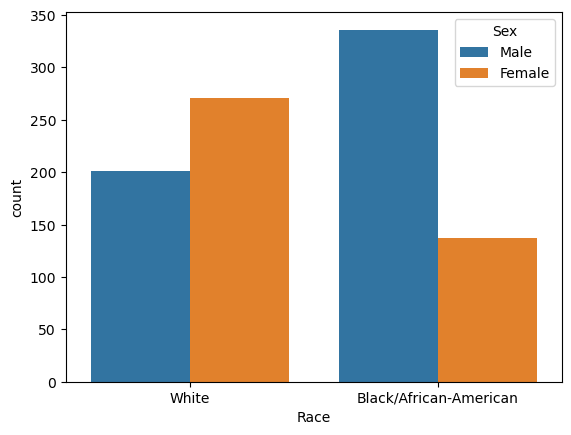

In [125]:
sns.countplot(data= df_patients,x="Race",hue="Sex")

# 6. Put the patients in group based on their Age

In [119]:
bins= [30,40,50,60,70,80]
labels = ['30-40','40-50','50-60','60-70','70-80']
df_patients['AgeGroup'] = pd.cut(df_patients['Age'], bins=bins, labels=labels, right=False)
df_patients


,PatientID,FirstName,LastName,BirthDate,Sex,Race,Language,Date,Age,AgeGroup
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,1960-01-01,63,60-70
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,1985-11-15,37,30-40
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,1976-04-15,47,40-50
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,1968-10-15,54,50-60
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,1962-05-01,60,60-70
...,...,...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,1986-05-26,36,30-40
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,1970-06-10,52,50-60
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,1983-01-08,40,40-50
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,1963-06-05,59,50-60


# 7. Calculate the number of patients in each age group

In [130]:
x = df_patients["PatientID"].groupby(df_patients["AgeGroup"]).count()
x

AgeGroup
30-40    130
40-50    359
50-60    332
60-70    124
70-80      0
Name: PatientID, Length: 5, dtype: int64

In [135]:
name = input("Enter the last name to get the first name: ")
df_patients["LastName"].loc[df_patients['FirstName'] == name]

Enter the last name to get the first name: Sue


Series([], Name: LastName, Length: 0, dtype: object)